In [1]:
import cartopy

from torch.utils.data import Dataset, DataLoader
import torch 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import scipy
import pickle
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy

import cmocean

import sys
sys.path.append('/home/av555/iclr/')
sys.path.append('/home/av555/iclr/plots/')

from architectures import *
from trainer import *
from loaders import *
from models import *
from utils import *

from plot_utils import *
from plot_loaders import GermanyHighResLoader

from torch.distributions import Normal, MultivariateNormal

In [2]:
use_cpu = True
device = torch.device('cpu') if use_cpu else torch.device('cuda')

In [3]:
#######n IND
ind = 366

In [4]:
# data
val_ds = GermanyHighResLoader("/home/av555/iclr/data/", device=device)
val_loader = DataLoader(
    val_ds, batch_size = 2, shuffle = False)

In [5]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convCNP_value_all/epoch_491"
concnp_model = convCNP(
    in_channels=25)

convcnp_model, _, _ = load_model(convcnp_path, concnp_model)
convcnp_dict = get_samples(convcnp_model, val_ds, ind)

/home/av555/iclr/plots/plot_loaders.py:91: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630815121/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  y_context = torch.from_numpy(self.y_context[index,...]).float()
/home/av555/.conda/envs/kernelcnp_env/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator RobustScaler from version 0.22.2.post1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitation

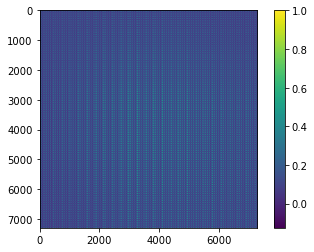

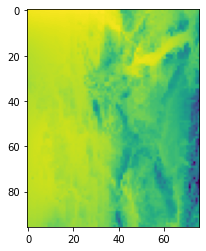

/home/av555/iclr/plots/plot_utils.py:139: RuntimeWarning: invalid value encountered in sqrt
  pred_sigma = np.sqrt(torch.diagonal(cov).detach().numpy().reshape(96,76))
/home/av555/.conda/envs/kernelcnp_env/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator RobustScaler from version 0.22.2.post1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
# ConvGNP

convgnp_linear_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_linear_value_all/epoch_488"
convgnp_linear_model = convGNPLinear()
convgnp_linear_model, _, _ = load_model(convgnp_linear_path, convgnp_linear_model)
convgnp_linear_dict = get_samples_convGNP(convgnp_linear_model, val_ds, ind)

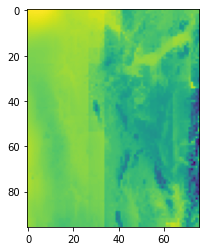

/home/av555/.conda/envs/kernelcnp_env/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator RobustScaler from version 0.22.2.post1 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
# ConvGNP

convgnp_kvv_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_kvv_value_all/epoch_401"
convgnp_kvv_model = convGNPKvv()

convgnp_kvv_model, _, _ = load_model(convgnp_kvv_path, convgnp_kvv_model)
convgnp_kvv_dict = get_samples_convGNP_kvv(convgnp_kvv_model, val_ds, ind)

/home/av555/.conda/envs/kernelcnp_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/av555/.conda/envs/kernelcnp_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/av555/.conda/envs/kernelcnp_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(se

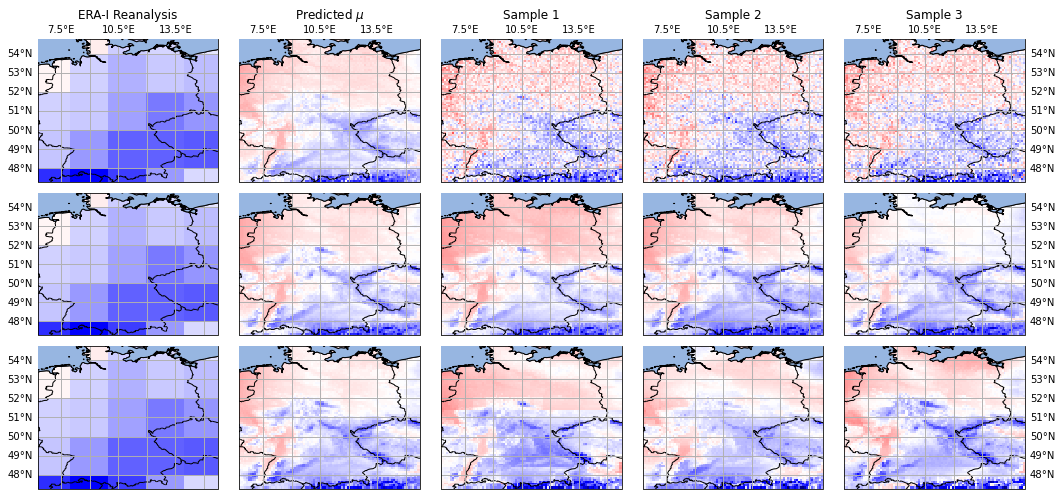

In [8]:
plot_gfigure(convcnp_dict, convgnp_linear_dict, convgnp_kvv_dict)